# Explore here

In [39]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, LinearRegression
import numpy as np
from pickle import dump
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv", sep = ",")

save_path = r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\RLR\data\raw\raw_data.csv"

# We save the csv file
df.to_csv(save_path, index=False)

df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


we want to find out if there is any relationship between health resources and sociodemographic data

In [3]:
df.info

<bound method DataFrame.info of        fips  TOT_POP    0-9  0-9 y/o % of total pop  19-Oct  \
0      1001    55601   6787               12.206615    7637   
1      1003   218022  24757               11.355276   26913   
2      1005    24881   2732               10.980266    2960   
3      1007    22400   2456               10.964286    2596   
4      1009    57840   7095               12.266598    7570   
...     ...      ...    ...                     ...     ...   
3135  56037    43051   6104               14.178532    6326   
3136  56039    23081   2384               10.328842    2185   
3137  56041    20299   3121               15.375142    3205   
3138  56043     7885    858               10.881420    1113   
3139  56045     6967    780               11.195637     779   

      10-19 y/o % of total pop  20-29  20-29 y/o % of total pop  30-39  \
0                    13.735364   6878                 12.370281   7089   
1                    12.344167  23579                 10.814964

In [4]:
df.shape

(3140, 108)

In [5]:
print(df.columns.tolist()) 

['fips', 'TOT_POP', '0-9', '0-9 y/o % of total pop', '19-Oct', '10-19 y/o % of total pop', '20-29', '20-29 y/o % of total pop', '30-39', '30-39 y/o % of total pop', '40-49', '40-49 y/o % of total pop', '50-59', '50-59 y/o % of total pop', '60-69', '60-69 y/o % of total pop', '70-79', '70-79 y/o % of total pop', '80+', '80+ y/o % of total pop', 'White-alone pop', '% White-alone', 'Black-alone pop', '% Black-alone', 'Native American/American Indian-alone pop', '% NA/AI-alone', 'Asian-alone pop', '% Asian-alone', 'Hawaiian/Pacific Islander-alone pop', '% Hawaiian/PI-alone', 'Two or more races pop', '% Two or more races', 'POP_ESTIMATE_2018', 'N_POP_CHG_2018', 'GQ_ESTIMATES_2018', 'R_birth_2018', 'R_death_2018', 'R_NATURAL_INC_2018', 'R_INTERNATIONAL_MIG_2018', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2018', 'Less than a high school diploma 2014-18', 'High school diploma only 2014-18', "Some college or associate's degree 2014-18", "Bachelor's degree or higher 2014-18", 'Percent of adults with les

Ver si hay duplicados, si hay valores nulos, si hay alguna columna con solo un valor, 

In [6]:
df.head()

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2


In [7]:
print(df.nunique().to_string())

fips                                                                             3140
TOT_POP                                                                          3074
0-9                                                                              2723
0-9 y/o % of total pop                                                           3136
19-Oct                                                                           2743
10-19 y/o % of total pop                                                         3137
20-29                                                                            2698
20-29 y/o % of total pop                                                         3137
30-39                                                                            2708
30-39 y/o % of total pop                                                         3133
40-49                                                                            2693
40-49 y/o % of total pop                              

In [8]:
df.nunique()

fips                      3140
TOT_POP                   3074
0-9                       2723
0-9 y/o % of total pop    3136
19-Oct                    2743
                          ... 
CKD_prevalence              43
CKD_Lower 95% CI            39
CKD_Upper 95% CI            46
CKD_number                1894
Urban_rural_code             6
Length: 108, dtype: int64

In [9]:
df.drop_duplicates().reset_index(drop = True)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,1001,55601,6787,12.206615,7637,13.735364,6878,12.370281,7089,12.749771,...,3644,12.9,11.9,13.8,5462,3.1,2.9,3.3,1326,3
1,1003,218022,24757,11.355276,26913,12.344167,23579,10.814964,25213,11.564429,...,14692,12.0,11.0,13.1,20520,3.2,3.0,3.5,5479,4
2,1005,24881,2732,10.980266,2960,11.896628,3268,13.134520,3201,12.865239,...,2373,19.7,18.6,20.6,3870,4.5,4.2,4.8,887,6
3,1007,22400,2456,10.964286,2596,11.589286,3029,13.522321,3113,13.897321,...,1789,14.1,13.2,14.9,2511,3.3,3.1,3.6,595,2
4,1009,57840,7095,12.266598,7570,13.087828,6742,11.656293,6884,11.901798,...,4661,13.5,12.6,14.5,6017,3.4,3.2,3.7,1507,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135,56037,43051,6104,14.178532,6326,14.694200,5359,12.448027,6577,15.277229,...,2098,8.9,8.3,9.6,2834,2.6,2.4,2.8,821,5
3136,56039,23081,2384,10.328842,2185,9.466661,2967,12.854729,4093,17.733200,...,928,7.2,6.5,8.0,1360,2.4,2.2,2.6,447,5
3137,56041,20299,3121,15.375142,3205,15.788955,2153,10.606434,2702,13.311001,...,1163,10.4,9.5,11.2,1500,3.0,2.8,3.2,430,5
3138,56043,7885,858,10.881420,1113,14.115409,715,9.067850,903,11.452124,...,506,11.3,10.3,12.1,686,3.4,3.2,3.7,207,6


To reach our goal which is to  find out if there is any relationship between health resources and sociodemographic data, we will begin by dropping the columns that provide geographical data.

In [10]:
df = df.drop(columns=['fips', 'COUNTY_NAME', 'STATE_NAME', 'STATE_FIPS', 'CNTY_FIPS'])

In [11]:
df.isnull().sum()

TOT_POP                     0
0-9                         0
0-9 y/o % of total pop      0
19-Oct                      0
10-19 y/o % of total pop    0
                           ..
CKD_prevalence              0
CKD_Lower 95% CI            0
CKD_Upper 95% CI            0
CKD_number                  0
Urban_rural_code            0
Length: 103, dtype: int64

In [12]:
df.shape

(3140, 103)

In [13]:
print(df.isnull().mean().mul(100).to_string())

TOT_POP                                                                          0.0
0-9                                                                              0.0
0-9 y/o % of total pop                                                           0.0
19-Oct                                                                           0.0
10-19 y/o % of total pop                                                         0.0
20-29                                                                            0.0
20-29 y/o % of total pop                                                         0.0
30-39                                                                            0.0
30-39 y/o % of total pop                                                         0.0
40-49                                                                            0.0
40-49 y/o % of total pop                                                         0.0
50-59                                                            

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TOT_POP,3140.0,104189.412420,333583.395432,88.0,10963.250000,25800.500000,67913.000000,1.010552e+07
0-9,3140.0,12740.302866,41807.301846,0.0,1280.500000,3057.000000,8097.000000,1.208253e+06
0-9 y/o % of total pop,3140.0,11.871051,2.124081,0.0,10.594639,11.802727,12.951840,2.546068e+01
19-Oct,3140.0,13367.976752,42284.392134,0.0,1374.500000,3274.000000,8822.250000,1.239139e+06
10-19 y/o % of total pop,3140.0,12.694609,1.815044,0.0,11.674504,12.687422,13.659282,2.330437e+01
...,...,...,...,...,...,...,...,...
CKD_prevalence,3140.0,3.446242,0.568059,1.8,3.100000,3.400000,3.800000,6.200000e+00
CKD_Lower 95% CI,3140.0,3.207516,0.527740,1.7,2.900000,3.200000,3.500000,5.800000e+00
CKD_Upper 95% CI,3140.0,3.710478,0.613069,1.9,3.300000,3.700000,4.100000,6.600000e+00
CKD_number,3140.0,2466.234076,7730.422067,3.0,314.750000,718.000000,1776.250000,2.377660e+05


We will proceed to split the data into training and testing data.

In [15]:
X = df.drop(columns=["Heart disease_number"])
y = df["Heart disease_number"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
train_indices = list(X_train.index)
test_indices = list(X_test.index)

We transform the data according to the fit in the traing data.

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
# We create DataFrames with scaled data for inspection
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_scaled_df.head()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
0,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,-0.228216,...,-0.222477,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528
1,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,-0.163303,...,-0.117073,0.021661,-0.060621,0.064137,-0.135257,0.109985,0.000382,0.161947,-0.135212,0.249092
2,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,-0.193726,...,-0.194220,-0.312388,-0.330555,-0.329256,-0.188714,-0.959495,-0.959698,-0.994232,-0.204982,-1.735217
3,-0.048115,-0.049041,0.120407,-0.029705,0.576280,-0.067671,0.094875,-0.062335,0.335452,-0.044847,...,-0.021363,-0.683554,-0.639050,-0.722650,-0.057561,-0.781249,-0.767682,-0.829064,-0.055748,-1.073780
4,0.070012,0.073864,0.252809,0.080526,0.234535,0.038603,0.173362,0.025430,0.070962,0.048850,...,0.232009,-0.201038,-0.137745,-0.221967,0.100319,-0.068262,0.000382,-0.168390,0.108446,-0.412344


In [21]:
# We save the dataframes into csv files to have access to them easily.
X_train_scaled_df["Heart disease_number"] = list(y_train)
X_test_scaled_df["Heart disease_number"] = list(y_test)

X_train_scaled_df.to_csv(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\RLR\data\processed\clean_train.csv", index = False)
X_test_scaled_df.to_csv(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\RLR\data\processed\clean_test.csv", index = False)

In [22]:
final_data = pd.concat([X_train_scaled_df, X_test_scaled_df])
final_data.head()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,-0.228216,...,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528,2072
1,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,-0.163303,...,0.021661,-0.060621,0.064137,-0.135257,0.109985,0.000382,0.161947,-0.135212,0.249092,3796
2,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,-0.193726,...,-0.312388,-0.330555,-0.329256,-0.188714,-0.959495,-0.959698,-0.994232,-0.204982,-1.735217,2222
3,-0.048115,-0.049041,0.120407,-0.029705,0.576280,-0.067671,0.094875,-0.062335,0.335452,-0.044847,...,-0.683554,-0.639050,-0.722650,-0.057561,-0.781249,-0.767682,-0.829064,-0.055748,-1.073780,5484
4,0.070012,0.073864,0.252809,0.080526,0.234535,0.038603,0.173362,0.025430,0.070962,0.048850,...,-0.201038,-0.137745,-0.221967,0.100319,-0.068262,0.000382,-0.168390,0.108446,-0.412344,8686


We will start using the data we previously saved.

In [23]:
training_data = pd.read_csv(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\RLR\data\processed\clean_train.csv")
testing_data = pd.read_csv(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\RLR\data\processed\clean_test.csv")

training_data.head()

,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,40-49,...,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code,Heart disease_number
0,-0.229763,-0.225393,0.102383,-0.231350,0.162374,-0.229775,-0.429454,-0.223780,-0.665485,-0.228216,...,0.244361,0.209312,0.314479,-0.215940,0.644725,0.576430,0.657452,-0.216950,0.910528,2072
1,-0.161280,-0.179851,-0.754597,-0.181109,-0.836073,-0.188375,-0.736296,-0.176225,-0.785934,-0.163303,...,0.021661,-0.060621,0.064137,-0.135257,0.109985,0.000382,0.161947,-0.135212,0.249092,3796
2,-0.198764,-0.209983,-0.717144,-0.195009,0.464170,-0.168470,1.320194,-0.194740,-0.128551,-0.193726,...,-0.312388,-0.330555,-0.329256,-0.188714,-0.959495,-0.959698,-0.994232,-0.204982,-1.735217,2222
3,-0.048115,-0.049041,0.120407,-0.029705,0.576280,-0.067671,0.094875,-0.062335,0.335452,-0.044847,...,-0.683554,-0.639050,-0.722650,-0.057561,-0.781249,-0.767682,-0.829064,-0.055748,-1.073780,5484
4,0.070012,0.073864,0.252809,0.080526,0.234535,0.038603,0.173362,0.025430,0.070962,0.048850,...,-0.201038,-0.137745,-0.221967,0.100319,-0.068262,0.000382,-0.168390,0.108446,-0.412344,8686


In [24]:
# From the imported data, we specify the variables for testing and training. The Xs are already scaled.
X_train = training_data.drop(["Heart disease_number"], axis = 1)
y_train = training_data["Heart disease_number"]
X_test = testing_data.drop(["Heart disease_number"], axis = 1)
y_test = testing_data["Heart disease_number"]

In [32]:
# We generate a linear regression model, for we have a continuous target rather than a binary one.
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_pred)
print(f"Linear Regression R2 Score: {lr_r2}")

Linear Regression R2 Score: 0.9983972945202244


In [33]:
# We generate a lasso model with default parameters.
lasso_default = Lasso(random_state=42)
lasso_default.fit(X_train, y_train)
lasso_default_pred = lasso_default.predict(X_test)
lasso_default_r2 = r2_score(y_test, lasso_default_pred)
print(f"Lasso (default) R2 Score: {lasso_default_r2}")

Lasso (default) R2 Score: 0.997229453259776


d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.725e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(


In [36]:
# We will now analyze how R2 evolves with different alpha values
alphas = np.logspace(-2, 2, 50)  # 50 values from 0.01 to 100
r2_scores = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, random_state=42)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    r2_scores.append(r2_score(y_test, lasso_pred))

d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.797e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.800e+08, tolerance: 7.097e+07
  model = cd_fast.enet_coordinate_descent(
d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

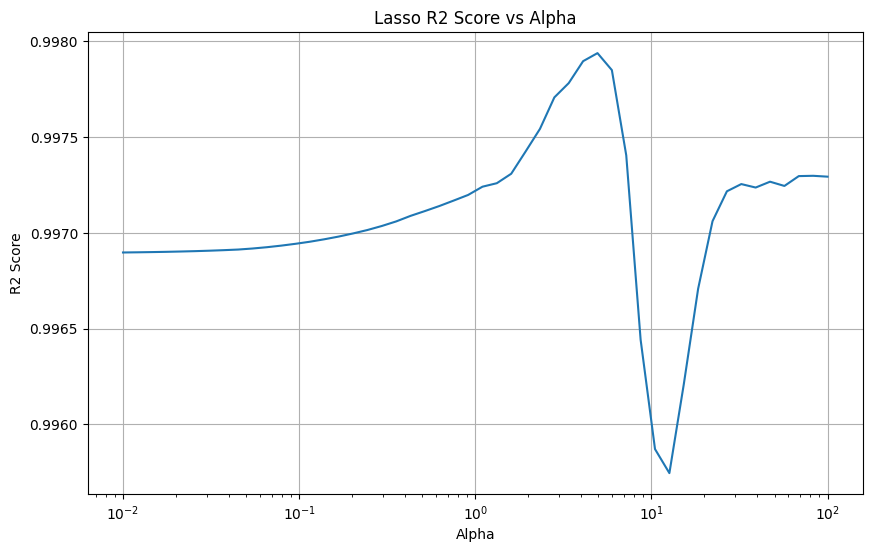

In [38]:
# Plot R2 scores vs alpha values
plt.figure(figsize=(10, 6))
plt.semilogx(alphas, r2_scores)
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title('Lasso R2 Score vs Alpha')
plt.grid(True)
plt.show()

We will now optimise the Lasso model.

In [42]:
param_grid = {'alpha': alphas}
lasso = Lasso(random_state=42)
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.016e+08, tolerance: 6.128e+07
  model = cd_fast.enet_coordinate_descent(
d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.809e+08, tolerance: 6.052e+07
  model = cd_fast.enet_coordinate_descent(
d:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\.venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

GridSearchCV(cv=5, estimator=Lasso(random_state=42),
             param_grid={'alpha': array([1.00000000e-02, 1.20679264e-02, 1.45634848e-02, 1.75751062e-02,
       2.12095089e-02, 2.55954792e-02, 3.08884360e-02, 3.72759372e-02,
       4.49843267e-02, 5.42867544e-02, 6.55128557e-02, 7.90604321e-02,
       9.54095476e-02, 1.15139540e-01, 1.38949549e-01, 1.67683294e-01,
       2.02358965e-01, 2.44205309e-01, 2....
       9.10298178e-01, 1.09854114e+00, 1.32571137e+00, 1.59985872e+00,
       1.93069773e+00, 2.32995181e+00, 2.81176870e+00, 3.39322177e+00,
       4.09491506e+00, 4.94171336e+00, 5.96362332e+00, 7.19685673e+00,
       8.68511374e+00, 1.04811313e+01, 1.26485522e+01, 1.52641797e+01,
       1.84206997e+01, 2.22299648e+01, 2.68269580e+01, 3.23745754e+01,
       3.90693994e+01, 4.71486636e+01, 5.68986603e+01, 6.86648845e+01,
       8.28642773e+01, 1.00000000e+02])},
             scoring='r2')

In [43]:
best_lasso = grid_search.best_estimator_
best_alpha = grid_search.best_params_['alpha']
best_score = grid_search.best_score_

print(f"Best Alpha: {best_alpha}")
print(f"Best Cross-Validation R2 Score: {best_score}")

Best Alpha: 8.68511373751352
Best Cross-Validation R2 Score: 0.9968639351758213


In [45]:
# We will now evaluate on test data
best_lasso_pred = best_lasso.predict(X_test)
best_lasso_r2 = r2_score(y_test, best_lasso_pred)
print(f"Optimized Lasso R2 Score on test data: {best_lasso_r2}")

Optimized Lasso R2 Score on test data: 0.9964421322490435


In [56]:
# We analyze the coefficients of the best Lasso model
lasso_coef = pd.DataFrame({
    'feature': X_train.columns,
    'coefficient': best_lasso.coef_
})

# We add to a variable the number of coeficients that are = to 0 or not.
zero_coef_count = sum(best_lasso.coef_ == 0)
non_zero_coef_count = sum(best_lasso.coef_ != 0)

print(f"Number of coefficients set to zero: {zero_coef_count}")
print(f"Number of non-zero coefficients: {non_zero_coef_count}")

Number of coefficients set to zero: 62
Number of non-zero coefficients: 40


In [57]:
# Display non-zero coefficients
non_zero_coef = lasso_coef[lasso_coef['coefficient'] != 0].sort_values('coefficient', key=abs, ascending=False)
print("\nNon-zero coefficients:")
print(non_zero_coef)


Non-zero coefficients:
                                               feature  coefficient
92                                         COPD_number  4534.087604
15                                               70-79  4103.382078
48                                         POVALL_2018  2204.755689
41                    High school diploma only 2014-18  2086.325896
17                                                 80+  2027.967326
96                                     diabetes_number  1547.857593
11                                               50-59   904.742203
70               Internal Medicine Primary Care (2019)  -735.461078
69                              Total Hospitals (2019)   698.558845
71   Family Medicine/General Practice Primary Care ...  -496.637521
19                                     White-alone pop   488.007801
57                                     Unemployed_2018  -452.598534
32                                      N_POP_CHG_2018   285.888313
68                   Tot

In [58]:
dump(best_lasso, open(r"D:\01A-TRABAJO\PYTHON\DATASCIENCE\EJERCICIOS\LRL\RLR\models\model.sav", "wb"))